# Evaluate running time by number of samples

In this tutorial we evaluate the running time of ternadecov for a varying number of samples using the GP trajectory model. The configuration of this tutorial has been set so that it completes in under 5 minutes. In order to generate more interesting plots increase the `n_iters` to 20k and set `n_sample_range` to span the range 500-1000.

In [1]:
# load libraries
import anndata
import matplotlib.pylab as plt
import torch
from ternadecov.time_deconv import *
from ternadecov.simulator import *
from ternadecov.stats_helpers import *
from ternadecov.dataset import *
from ternadecov.deconvolution_plotter import *
from ternadecov.parametrization import *
from ternadecov.evaluation import evaluate_with_trajectory
from ternadecov.deconvolution_writer import DeconvolutionWriter
from ternadecov.deconvolution_exporter import DeconvolutionExporter

## Configure

In [2]:
# number of iterations to run, 5k is low but fast >20k is recommended
n_iters = 5_000

# path to single-cell anndata dataset
sc_anndata_path = "/home/nbarkas/disk2/deconvolution_method/datasets/ebov/load_data_python/ebov_sc.h5ad"

In [3]:
with open(sc_anndata_path, 'rb') as fh:
    sc_anndata = anndata.read_h5ad(fh)

## Simulate data

In [4]:
types = DeconvolutionDatatypeParametrization()

Next we generate a 'SingleCellDataset' object. This is a special type of deconvolution dataset object that only contains single-cell data and is used only for simulations.

In [5]:
ebov_sc_dataset = SingleCellDataset(
    sc_anndata, 
    sc_celltype_col="Subclustering_reduced", 
    dtype_np=types.dtype_np, dtype = types.dtype, device=types.device)

Sample a random trajectory of celltypes that will be used for all iterations by only varying the number of samples draw from it


In [6]:
trajectory_coef = sample_trajectories(
    type = 'periodic',
    num_cell_types = ebov_sc_dataset.w_hat_gc.shape[1]
)

In [7]:
n_samples = []
l1_error_norm = []
fit_time = []
n_sample_range = list(range(10,30,5)) 
print(n_sample_range)

for n in n_sample_range:
    
    eval_result = evaluate_with_trajectory(
        sc_dataset = ebov_sc_dataset, 
        n_samples = n, 
        trajectory_type = 'periodic', 
        trajectory_coef = trajectory_coef,
        n_iters = n_iters,
        types = DeconvolutionDatatypeParametrization(),
        deconvolution_params = {
            'trajectory_model_type': 'gp',
            'hyperparameters': TimeRegularizedDeconvolutionModelParametrization(),
            'trajectory_hyperparameters': TimeRegularizedDeconvolutionGPParametrization(),
        }
    )
    
    n_samples.append(eval_result['n_samples'])
    l1_error_norm.append(eval_result['l1_error_norm'])
    fit_time.append(eval_result['fit_time'])

[10, 15, 20, 25]
log_sc_cutoff: 2


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.20335e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


3052 genes selected
[step: 0, time: 1 s ] loss: 329583.66
[step: 1000, time: 14 s ] loss: 230580.62
[step: 2000, time: 28 s ] loss: 190738.82
[step: 3000, time: 41 s ] loss: 176190.40
[step: 4000, time: 54 s ] loss: 171063.03


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.52216e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
2971 genes selected
[step: 0, time: 1 s ] loss: 462561.67
[step: 1000, time: 14 s ] loss: 335376.19
[step: 2000, time: 28 s ] loss: 273113.11
[step: 3000, time: 41 s ] loss: 251618.39
[step: 4000, time: 55 s ] loss: 242713.20


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.27208e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
3040 genes selected
[step: 0, time: 1 s ] loss: 644793.53
[step: 1000, time: 15 s ] loss: 457690.86
[step: 2000, time: 30 s ] loss: 373861.65
[step: 3000, time: 45 s ] loss: 338782.45
[step: 4000, time: 60 s ] loss: 326713.81


/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/nbarkas/disk1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.36363e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


log_sc_cutoff: 2
2997 genes selected
[step: 0, time: 1 s ] loss: 829963.88
[step: 1000, time: 15 s ] loss: 557964.98
[step: 2000, time: 30 s ] loss: 452781.98
[step: 3000, time: 45 s ] loss: 413098.86
[step: 4000, time: 60 s ] loss: 399103.24


In [8]:
evaluation_resuts_df = pd.DataFrame({'n_samples':n_samples, 'l1_error_norm': list(x.item() for x in l1_error_norm), 'fit_time': fit_time})

In [9]:
evaluation_resuts_df

,n_samples,l1_error_norm,fit_time
0,10,1.011617,67.379663
1,15,1.006774,67.814211
2,20,1.003288,74.080531
3,25,0.996785,74.306241


## Plot results

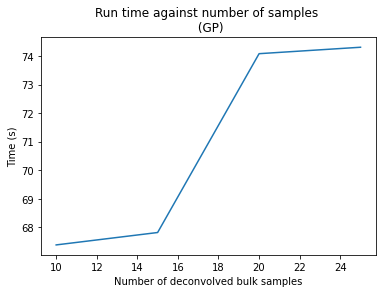

In [10]:
# Plot run-time
plt.plot(evaluation_resuts_df.n_samples.to_numpy(), evaluation_resuts_df.fit_time.to_numpy())
plt.xlabel("Number of deconvolved bulk samples")
plt.ylabel("Time (s)")
plt.title("Run time against number of samples \n (GP)")
plt.show()

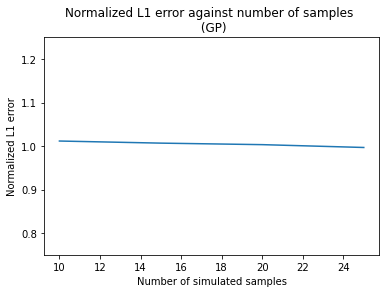

In [11]:
# Plot L1 loss
plt.plot(evaluation_resuts_df.n_samples.to_numpy(), evaluation_resuts_df.l1_error_norm.to_numpy())
plt.xlabel("Number of simulated samples")
plt.ylabel("Normalized L1 error")
plt.title("Normalized L1 error against number of samples \n (GP)")
plt.ylim(0.75,1.25)
plt.show()